<a href="https://colab.research.google.com/github/plaban1981/Fastai/blob/master/Image_Classification_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


https://debuggercafe.com/create-your-own-deep-learning-image-dataset/

In [147]:
%cp /content/Forest_cover '/content/drive/My Drive'

# Creating your own dataset from Google Images

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl')); 


window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n'))); 

In [65]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [66]:
from fastai import *
from fastai.vision import *

In [84]:
folder = 'forest'
file = 'forest'

In [85]:
path = Path('forest_cover/train')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [97]:
dest

PosixPath('forest_cover/train/urban')

In [87]:
download_images('/content/Forest_cover', dest, max_pics=200)

In [90]:
folder = 'urban'
file = 'urban'

In [88]:
path

PosixPath('forest_cover/train')

In [91]:
path = Path('forest_cover/train')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [92]:
download_images('/content/urban', dest, max_pics=200)

In [115]:
download_images('/content/forest_final', '/content/forest_cover/train/forest', max_pics=200)

In [114]:
download_images('/content/urban_final', '/content/forest_cover/train/urban', max_pics=200)

In [116]:
classes = ['forest','urban']

In [117]:
path

PosixPath('forest_cover/train')

In [118]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

forest


urban


In [119]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4)

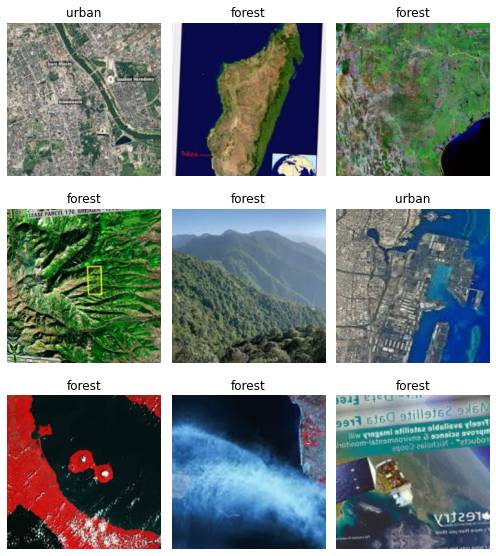

In [120]:
data.show_batch(rows=3, figsize=(7,8))

In [121]:
data

ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
urban,urban,urban,urban,urban
Path: forest_cover/train;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
forest,urban,forest,urban,urban
Path: forest_cover/train;

Test: None

# Train the Model

In [122]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [123]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.763062,0.440002,0.100000,00:14
1,0.565301,0.689409,0.050000,00:08
2,0.457262,0.705937,0.075000,00:08
3,0.387223,0.635693,0.062500,00:08


In [70]:
learn.unfreeze()

In [108]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

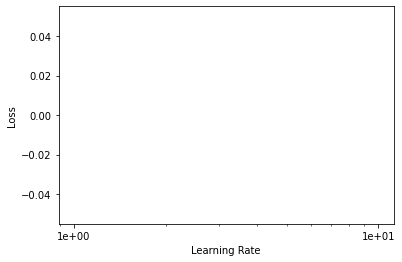

In [107]:
learn.recorder.plot()

In [73]:
learn.save('stage-1')

In [109]:
learn.fit_one_cycle(4, max_lr=0.0001)

epoch,train_loss,valid_loss,error_rate,time
0,0.235990,0.863043,0.291667,00:04
1,0.326642,0.756972,0.312500,00:04
2,0.297083,0.615364,0.250000,00:04
3,0.286574,0.528119,0.229167,00:04


In [124]:
interp = ClassificationInterpretation.from_learner(learn)

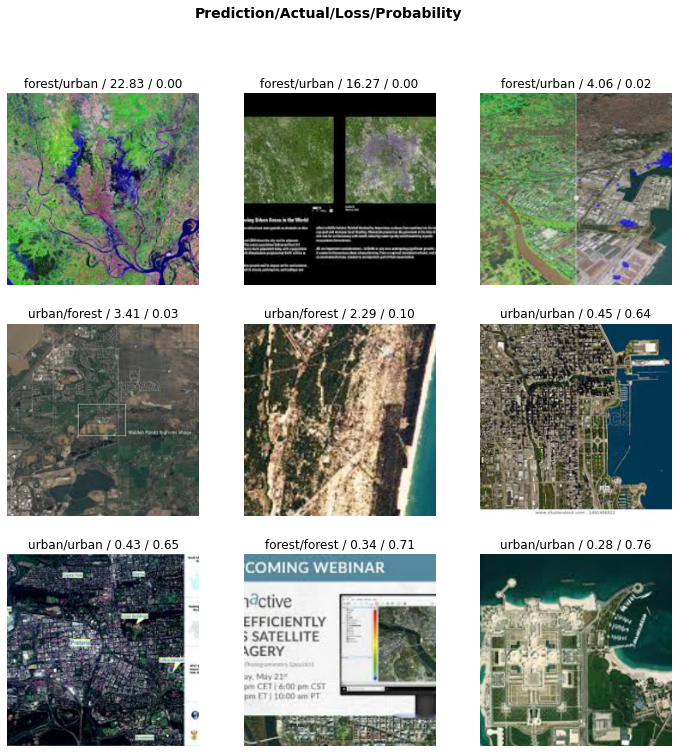

In [125]:
interp.plot_top_losses(9)

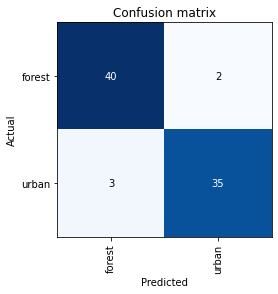

In [126]:
interp.plot_confusion_matrix()

In [127]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc*100))

The accuracy is 93.75 %.


# Use the trained model to make predictions on new image

In [128]:
img = open_image('/content/i_urban.jpg')

<Figure size 1440x792 with 0 Axes>

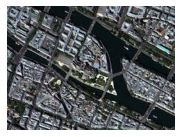

In [137]:
plt.figure(figsize=(20,11))
img.show()

In [129]:
pred_class,pred_idx,outputs = learn.predict(img)

In [132]:
pred_class,pred_idx,outputs

(Category tensor(1), tensor(1), tensor([4.3265e-11, 1.0000e+00]))

Model predicted the image to belong to class 1 .i.e. Urban 

# Image 2

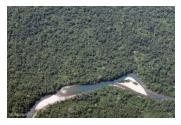

In [142]:
img = open_image('/content/images1.jpg')
img.show()

In [144]:
pred_class,pred_idx,outputs = learn.predict(img)

In [145]:
pred_class,pred_idx,outputs

(Category tensor(0), tensor(0), tensor([0.9233, 0.0767]))

The above image has been predicted to be that of Forest Cover